# Proyek Analisis Data: Bike Sharing
- **Nama:** Teguh Hardiansyah
- **Email:** hardiansyah080804@gmail.com  
- **ID Dicoding:** teguh_hardiansyah

## Menentukan Pertanyaan Bisnis

- 1.Bagaimana tren penyewaan sepeda dari 2011 hingga 2012? Tahun mana yang menunjukkan kinerja yang lebih baik?
- 2.Apa perbandingan penyewaan sepeda antara pengguna biasa dan pengguna terdaftar?
- 3.Bagaimana pola penyewaan sepeda antara hari libur, dan hari kerja?
- 4.Apa hubungan antara suhu (temp and atemp), kelembaban (hum), dan kecepatan angin dengan total penyewaan sepeda?
- 5.Bagaimana perubahan musim dan kondisi cuaca mempengaruhi total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans # type: ignore
from datetime import datetime
import calendar

## Data Wrangling

### Gathering Data

In [92]:
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Menilai tabel day_df

In [94]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [95]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [96]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())


Jumlah duplikasi data:  0


ubah kolom dteday yang semulanya object menjadi datetime

In [97]:
day_df.nunique()


instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [98]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- menilai hour_df

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*ada column yang tidak sesuai yakni dteday yang seharusnya datetime bukan object*

In [100]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())


Jumlah duplikasi data:  0


In [102]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [103]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- memperbaiki kolom dteday pada data day_df



In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- memperbaiki kolom dteday pada data hour_df

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- merubah nama column di day_hour agar tidak keliru dalam pembacaan tabel

In [18]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_count_user'
}, inplace=True)

In [19]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['day_name'] = day_df['weekday'].apply(lambda x: weekday_mapping[x])

In [21]:
day_df.sample(5)

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
522,523,2012-06-06,2,1,6,0,3,1,1,0.554167,0.542292,0.611250,0.077125,1027,6028,7055,Wednesday
485,486,2012-04-30,2,1,4,0,1,1,2,0.464167,0.457696,0.570000,0.171638,665,4907,5572,Monday
544,545,2012-06-28,3,1,6,0,4,1,1,0.749167,0.675512,0.422500,0.171650,921,5958,6879,Thursday
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441,Wednesday
373,374,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,0.701667,0.098900,106,2270,2376,Monday


In [22]:
day_df['year'] = day_df['year'].map({
    0: 2011,
    1: 2012,
})
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
})

In [23]:
day_df.sample(5)


,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
414,415,2012-02-19,Spring,2012,Feb,0,0,0,Misty/Cloudy,0.280000,0.265788,0.515833,0.253112,618,2071,2689,Sunday
292,293,2011-10-20,Winter,2011,Oct,0,4,1,Clear/Partly Cloudy,0.475833,0.466525,0.636250,0.422275,471,3724,4195,Thursday
3,4,2011-01-04,Spring,2011,Jan,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
335,336,2011-12-02,Winter,2011,Dec,0,5,1,Clear/Partly Cloudy,0.314167,0.331433,0.625833,0.100754,268,3672,3940,Friday
523,524,2012-06-07,Summer,2012,Jun,0,4,1,Clear/Partly Cloudy,0.602500,0.569442,0.567083,0.157350,1038,6456,7494,Thursday


In [24]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    object        
 3   year              731 non-null    int64         
 4   month             731 non-null    object        
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    object        
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [25]:

day_df['day_name'] = pd.to_datetime(day_df['dateday']).dt.day_name()
day_df['day_name'] = day_df.day_name.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [26]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    object        
 3   year              731 non-null    category      
 4   month             731 non-null    category      
 5   holiday           731 non-null    category      
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    category      
 8   weathersit        731 non-null    category      
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
day_df.sample(5)


,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
380,381,2012-01-16,Spring,2012,Jan,1,1,0,Clear/Partly Cloudy,0.190000,0.190663,0.522500,0.231358,217,2081,2298,Monday
5,6,2011-01-06,Spring,2011,Jan,0,4,1,Clear/Partly Cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606,Thursday
322,323,2011-11-19,Winter,2011,Nov,0,6,0,Clear/Partly Cloudy,0.329167,0.324483,0.502083,0.224496,943,2720,3663,Saturday
440,441,2012-03-16,Spring,2012,Mar,0,5,1,Misty/Cloudy,0.435833,0.436229,0.842083,0.113192,548,3830,4378,Friday
583,584,2012-08-06,Fall,2012,Aug,0,1,1,Misty/Cloudy,0.752500,0.710246,0.654167,0.129354,1233,5780,7013,Monday


In [28]:
monthly_day_df = day_df.resample(rule='M', on='dateday').agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
})
monthly_day_df.index = monthly_day_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_day_df = monthly_day_df.reset_index()
monthly_day_df.rename(columns={
    "instant": "count_id",
}, inplace=True)
monthly_day_df.head()

,dateday,count_id,casual,registered,total_count_user
0,January,31,3073,35116,38189
1,February,28,6242,41973,48215
2,March,31,12826,51219,64045
3,April,30,22346,72524,94870
4,May,31,31050,104771,135821


In [29]:
monthly_day_df.sample(24)


,dateday,count_id,casual,registered,total_count_user
9,October,31,25222,98289,123511
2,March,31,12826,51219,64045
18,July,31,41705,161902,203607
23,December,31,13245,110468,123713
1,February,28,6242,41973,48215
14,March,31,31618,133257,164875
8,September,30,26545,100873,127418
12,January,31,8969,87775,96744
5,June,30,30612,112900,143512
20,September,30,43778,174795,218573


In [30]:
group_ym = day_df.groupby(by=["year", "month"]).agg({
    "total_count_user": ['max', 'min', 'mean', 'sum'],
})
group_ym

total_count_user                           
                        max   min         mean     sum
year month                                            
2011 Apr               5312   795  3162.333333   94870
     Aug               5895  1115  4409.387097  136691
     Dec               3940   705  2816.870968   87323
     Feb               2927  1005  1721.964286   48215
     Jan               1985   431  1231.903226   38189
     Jul               6043  3285  4559.387097  141341
     Jun               5515  3767  4783.733333  143512
     Mar               3239   605  2065.967742   64045
     May               5805  2633  4381.322581  135821
     Nov               4486  1495  3405.566667  102167
     Oct               5511   627  3984.225806  123511
     Sep               5423  1842  4247.266667  127418
2012 Apr               7460  1027  5807.466667  174224
     Aug               7865  4549  6919.451613  214503
     Dec               6606   441  3990.741935  123713
     Feb               5062  1529  3556.448276  103137
     Jan               4521  1301  3120.774194   96744
     Jul               8173  4459  6567.967742  203607
     Jun               8120  4127  6761.000000  202830
     Mar               8362  3194  5318.548387  164875
     May               8294  2843  6318.225806  195865
     Nov               6852  2277  5088.800000  152664
     Oct               8156    22  6414.225806  198841
     Sep               8714  4073  7285.766667  218573

In [31]:
group_by_year_day_df = day_df.groupby(by="year").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="year", ascending=True)
group_by_year_day_df

,instant,casual,registered,total_count_user
year,,,,
2011,365,247252,995851,1243103
2012,366,372765,1676811,2049576


In [32]:
group_by_weathersit_day_df= day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="weathersit", ascending=False)
group_by_weathersit_day_df

,casual,registered,total_count_user
weathersit,,,
Misty/Cloudy,169776,827082,996858
Light Snow/Rain,3895,33974,37869
Clear/Partly Cloudy,446346,1811606,2257952


In [33]:
group_by_s_all_day_df = day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "total_count_user": ["sum", "max", "min", "mean"]
}).sort_values(by="weathersit", ascending=True)
group_by_s_all_day_df

instant  casual                       registered        \
                    nunique     sum   max min        mean        sum   max   
weathersit                                                                   
Clear/Partly Cloudy     463  446346  3410  15  964.030238    1811606  6946   
Light Snow/Rain          21    3895  1264   2  185.476190      33974  4324   
Misty/Cloudy            247  169776  3155   9  687.352227     827082  6844   

                                      total_count_user                          
                     min         mean              sum   max  min         mean  
weathersit                                                                      
Clear/Partly Cloudy  416  3912.755940          2257952  8714  431  4876.786177  
Light Snow/Rain       20  1617.809524            37869  4639   22  1803.285714  
Misty/Cloudy         491  3348.510121           996858  8362  605  4035.862348

<ipython-input-35-55d6e056c032>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-55d6e056c032>:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


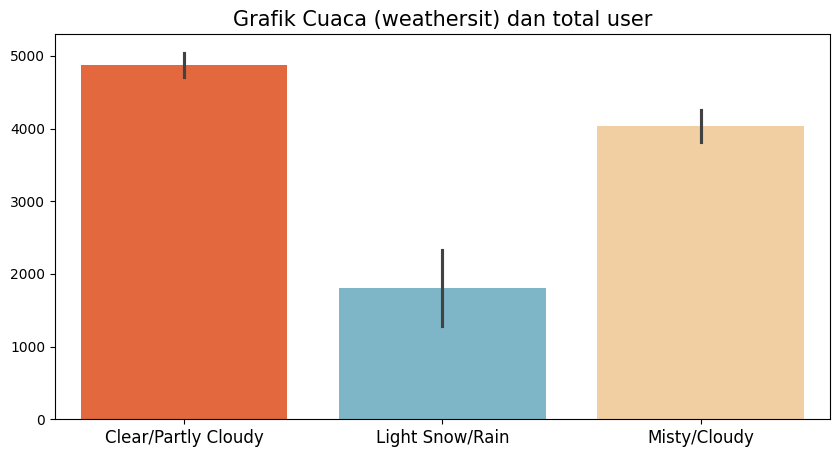

In [35]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot
colors_ = ["#FF5B22", "#72BCD4", "#FFCF96", "#39A7FF"]

sns.barplot(
    y="total_count_user",
    x="weathersit",
    data=day_df.sort_values(by="weathersit", ascending=False),
    palette=colors_
)
plt.title("Grafik Cuaca (weathersit) dan total user", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

- Berdasarkan Cuaca

In [36]:
group_by_season_day_df = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="season", ascending=False)

group_by_season_day_df

,casual,registered,total_count_user
season,,,
Winter,129782,711831,841613
Summer,203522,715067,918589
Spring,60622,410726,471348
Fall,226091,835038,1061129


- data day_df berdasarkan season

<ipython-input-37-d1c2d4955cb1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


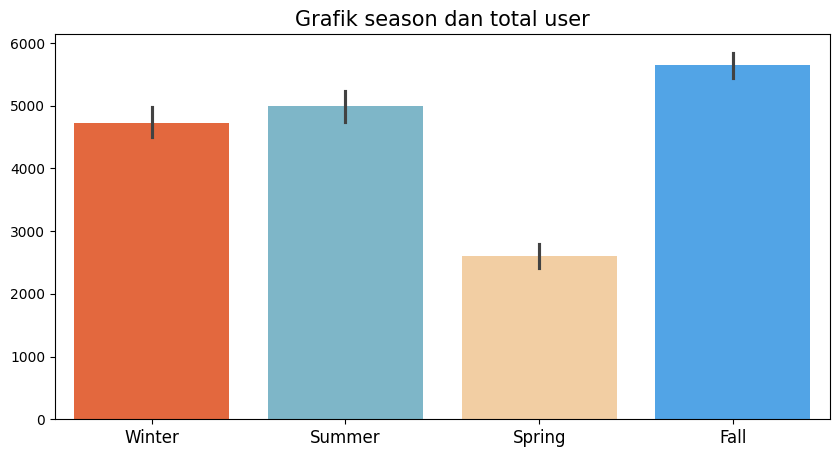

In [37]:
plt.figure(figsize=(10, 5))
colors_ = ["#FF5B22", "#72BCD4", "#FFCF96", "#39A7FF"]

sns.barplot(
    y="total_count_user",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors_
)
plt.title("Grafik season dan total user", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

pada grafik  diatas kita dapat melihat bahwasannya trend sewa sepeda dapat dipengaruhi oleh season dan paling banyak di musim fall

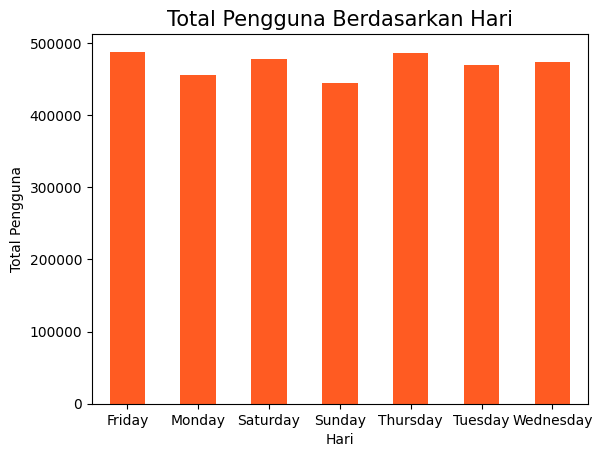

In [40]:
group_by_weekday_day_df["total_count_user"]["sum"].plot(kind="bar", color="#FF5B22")
plt.title("Total Pengguna Berdasarkan Hari", fontsize=15)
plt.xlabel("Hari")
plt.ylabel("Total Pengguna")
plt.xticks(rotation=0)
plt.show()

pada plot diatas dapat dilihat pada kolom min total_count_user bahwasanya penyewa terbanyak terjadi pada hari friday dan paling sedikit di hari sunday



In [41]:
group_by_holiday_day_df =day_df.groupby(by=['holiday']).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="holiday", ascending=True)

group_by_holiday_day_df

,casual,registered,total_count_user
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


<ipython-input-43-35c8c4b3ecc4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


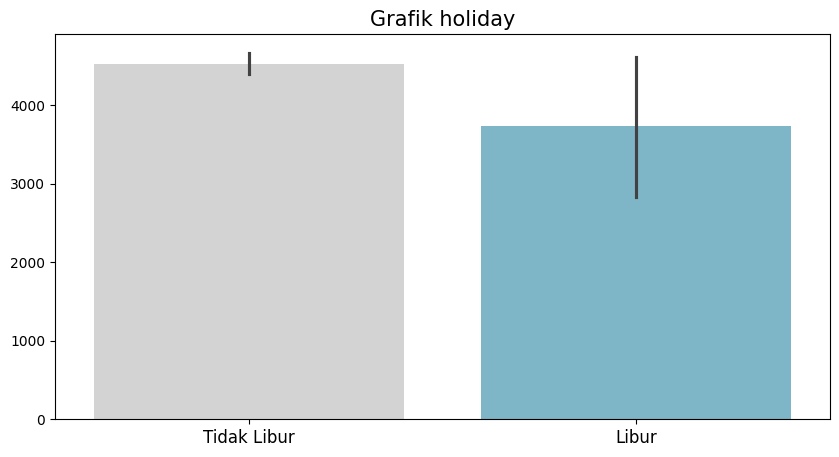

In [43]:
# Ganti label menggunakan replace atau mapping
day_df["holiday"] = day_df["holiday"].replace({0: "Tidak Libur", 1: "Libur"})

# Buat plot bar
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4"]
sns.barplot(
    y="total_count_user",
    x="holiday",
    data=day_df.sort_values(by=["holiday"], ascending=True),
    palette=colors_,
)
plt.title("Grafik holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [44]:
group_by_workingday_day_df =day_df.groupby(by=['workingday']).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="workingday", ascending=True)

group_by_workingday_day_df

,casual,registered,total_count_user
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


<ipython-input-51-b593b7c6d1f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


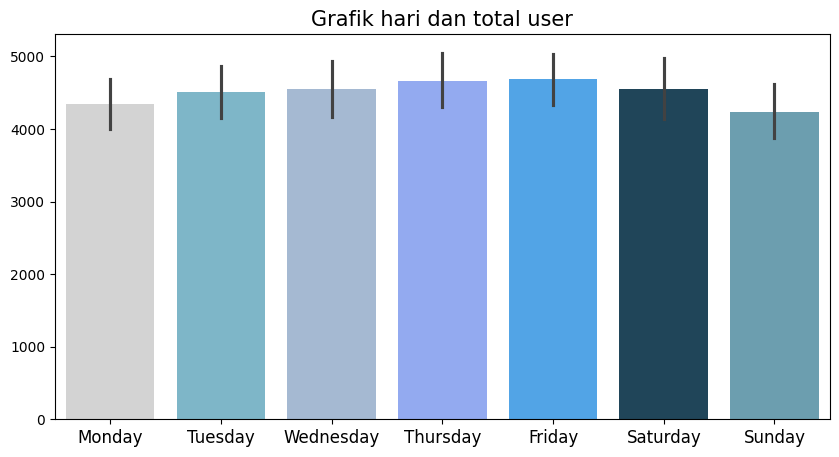

In [51]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#9EB8D9", "#83A2FF","#39A7FF", "#164863","#61A3BA"]
# order day
days_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
sns.barplot(
    y="total_count_user",
    x="day_name",
    data= day_df.sort_values(by=["weekday"], ascending=True),
    palette=colors_,
    order=days_order
)
plt.title("Grafik hari dan total user", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik diatas diketahui hari yang paling banyak terjadi penyewaan adalah friday

- Temperature

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count_user', data=day_df, hue='season')

plt.xlabel("Temperature x 41 degC")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

plot diatas menunjukan jumlah penyewa berdasarkan setiap musim. garis x yang bernilai 41 merupakan hasil bagi dari temperature

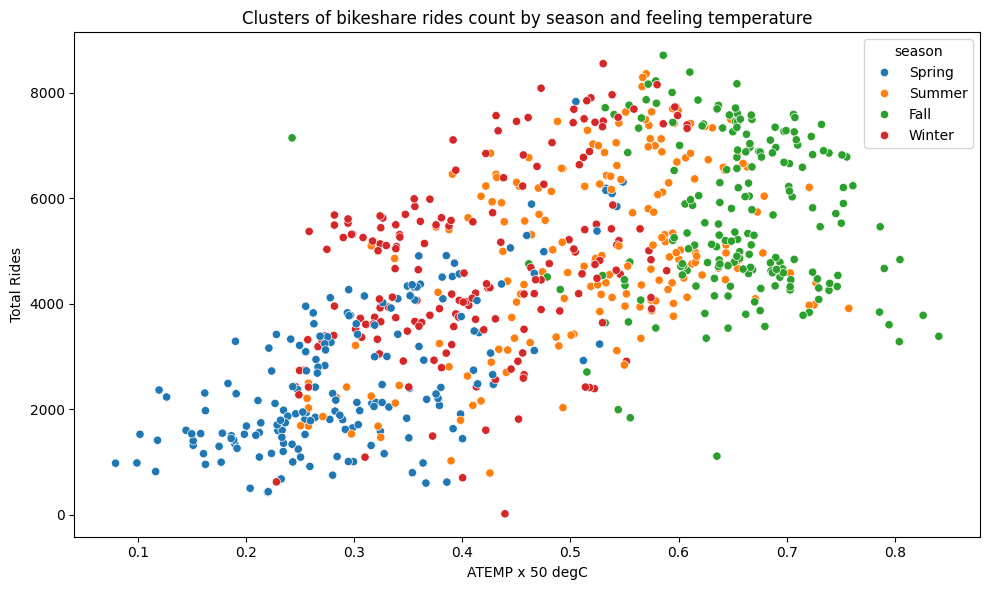

In [52]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='atemp', y='total_count_user', data=day_df, hue='season')

plt.xlabel("ATEMP x 50 degC")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and feeling temperature")

# Show the plot
plt.tight_layout()
plt.show()

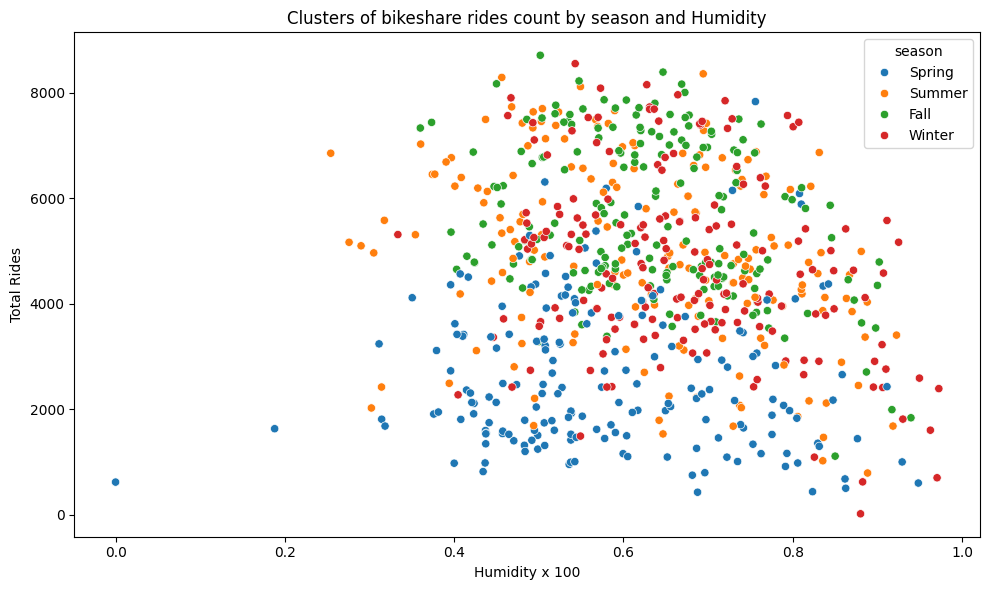

In [53]:
# humidity
plt.figure(figsize=(10,6))

sns.scatterplot(x='hum', y='total_count_user', data=day_df, hue='season')

plt.xlabel("Humidity x 100")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and Humidity")

# Show the plot
plt.tight_layout()
plt.show()

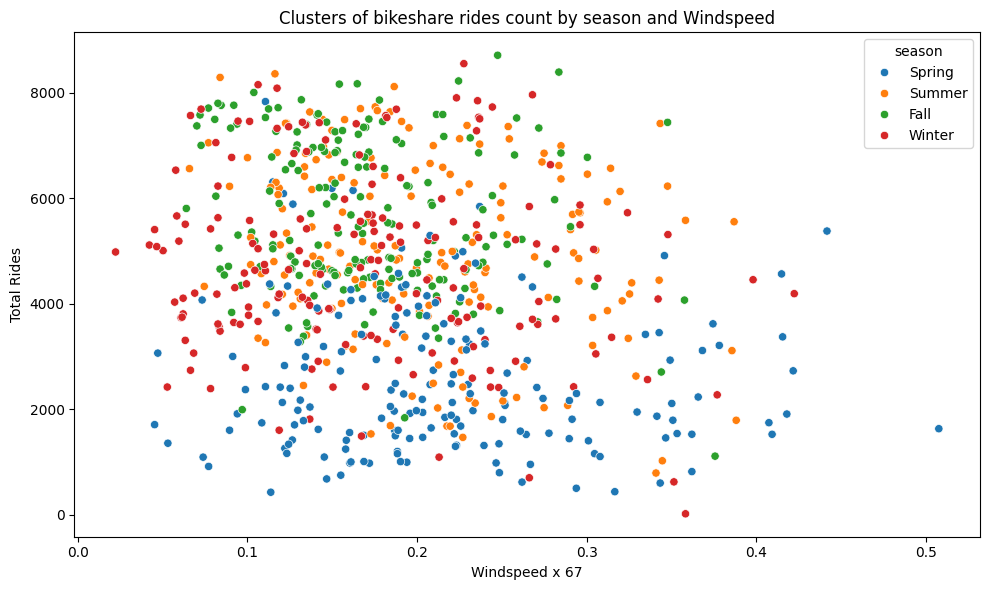

In [54]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='windspeed', y='total_count_user', data=day_df, hue='season')

plt.xlabel("Windspeed x 67")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and Windspeed")

# Show the plot
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penyewaan sepeda dari 2011 hingga 2012? Tahun mana yang menunjukkan kinerja yang lebih baik?

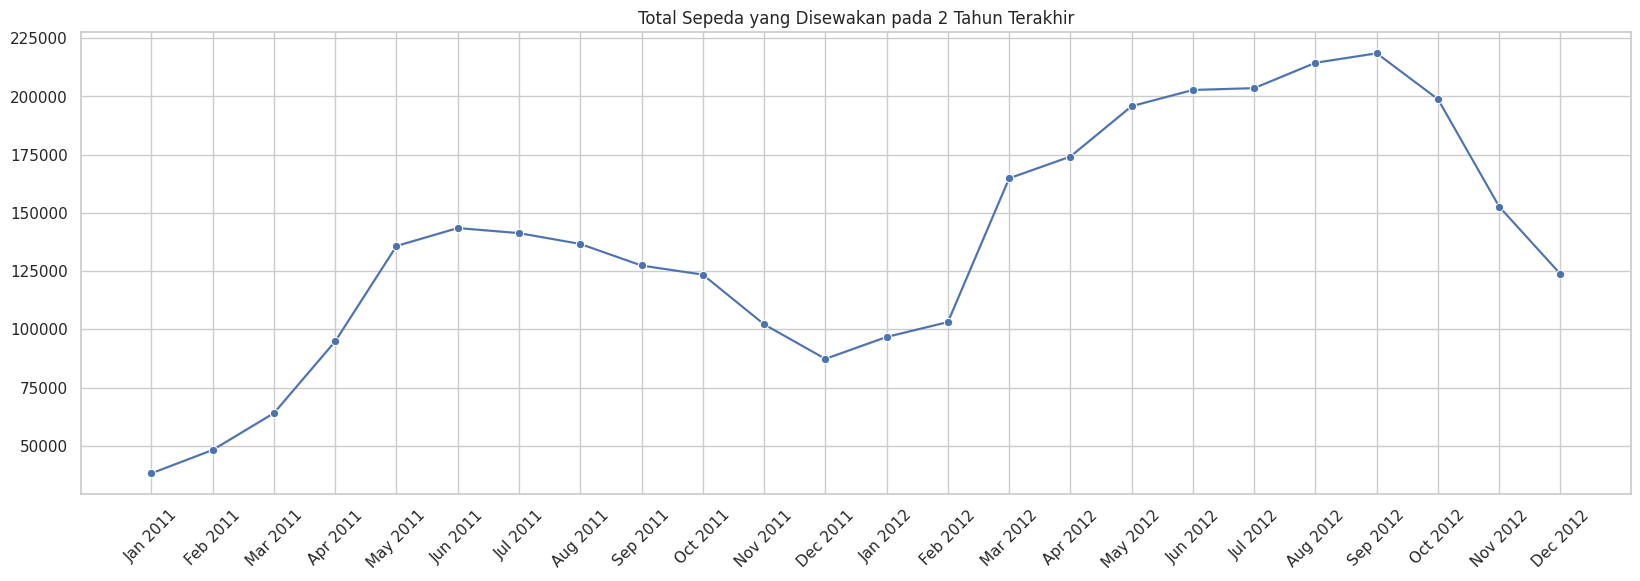

In [70]:
# Mengganti datatype untuk merge kolom
plot_month = day_df['month'].astype(str)
plot_year = day_df['year'].astype(str)

# Menggabungkan kolom month dan year untuk plot
day_df['year_month'] = plot_month + ' ' + plot_year

# Mengganti 'total_count_user' dengan nama kolom yang ingin dijumlahkan
day_df['total_sum'] = day_df.groupby('year_month')['total_count_user'].transform('sum')

# Membuat line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df,
    x='year_month',
    y='total_sum',
    marker='o'
)
plt.title("Total Sepeda yang Disewakan pada 2 Tahun Terakhir")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

In [71]:
day_df.groupby(by='year_month')['total_sum'].sum()


year_month
Apr 2011    2846100
Apr 2012    5226720
Aug 2011    4237421
Aug 2012    6649593
Dec 2011    2707013
Dec 2012    3835103
Feb 2011    1350020
Feb 2012    2990973
Jan 2011    1183859
Jan 2012    2999064
Jul 2011    4381571
Jul 2012    6311817
Jun 2011    4305360
Jun 2012    6084900
Mar 2011    1985395
Mar 2012    5111125
May 2011    4210451
May 2012    6071815
Nov 2011    3065010
Nov 2012    4579920
Oct 2011    3828841
Oct 2012    6164071
Sep 2011    3822540
Sep 2012    6557190
Name: total_sum, dtype: int64

Jika melihat total persewaan sepeda selama dua tahun terakhir dalam plot diatas, terlihat bahwa minat terhadap persewaan sepeda mengalami peningkatan  yang cukup signifikan pada tahun 2012  dibandingkan  tahun sebelumnya.Harga sewa sepeda tertinggi tercatat pada bulan September 2012, namun secara keseluruhan jumlah sewa mengalami penurunan pada bulan-bulan berikutnya.
 Sewa terendah tahun 2012 tercatat pada bulan Januari.
 Pada tahun 2011, harga sewa sepeda tertinggi tercatat pada bulan Juli dan harga terendah tercatat pada bulan Januari 2011.



### Pertanyaan 2: Apa perbandingan penyewaan sepeda antara pengguna biasa dan pengguna terdaftar?


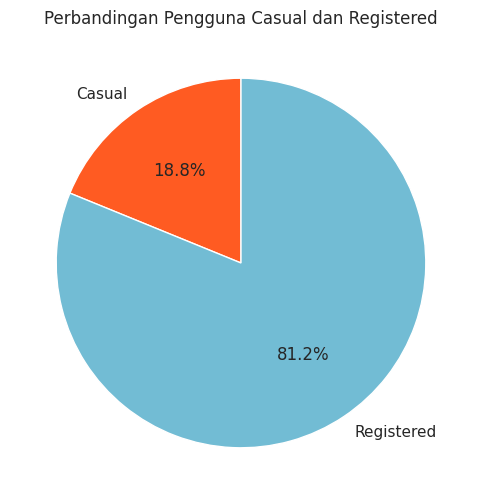

Jumlah pengguna casual: 620017
Jumlah pengguna registered: 2672662


In [72]:

# Menghitung jumlah pengguna casual dan registered
casual_users = day_df['casual'].sum()
registered_users = day_df['registered'].sum()

# Membuat pie chart
plt.figure(figsize=(12, 6))
plt.pie([casual_users, registered_users], labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['#FF5B22', '#72BCD4'])
plt.title('Perbandingan Pengguna Casual dan Registered')
plt.show()

# Menampilkan jumlah pengguna
print("Jumlah pengguna casual:", casual_users)
print("Jumlah pengguna registered:", registered_users)



Dapat dilihat bahwa pengguna terdaftar mendominasi jumlah penyewaan sepeda dengan persentase 76.7% dibandingkan dengan pengguna biasa yang hanya menyumbang 23.3%. Hal ini menunjukkan bahwa sebagian besar pengguna lebih memilih untuk mendaftar sebagai anggota daripada hanya menyewa sepeda secara casual.

### Pertanyaan 3: Bagaimana pola penyewaan sepeda antara hari libur, dan hari kerja?


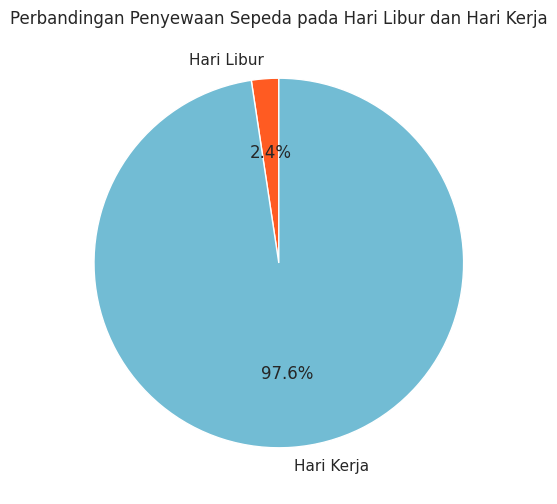

Jumlah penyewaan pada hari libur: 78435
Jumlah penyewaan pada hari kerja: 3214244


In [82]:

# Menghitung jumlah penyewaan sepeda pada hari libur dan hari kerja
holiday_rides = day_df[day_df['holiday'] == 'Libur']['total_count_user'].sum()
workingday_rides = day_df[day_df['holiday'] == 'Tidak Libur']['total_count_user'].sum()

# Membuat pie chart
plt.figure(figsize=(12, 6))
plt.pie([holiday_rides, workingday_rides], labels=['Hari Libur', 'Hari Kerja'], autopct='%1.1f%%', startangle=90, colors=['#FF5B22', '#72BCD4'])
plt.title('Perbandingan Penyewaan Sepeda pada Hari Libur dan Hari Kerja')
plt.show()

# Menampilkan jumlah penyewaan
print("Jumlah penyewaan pada hari libur:", holiday_rides)
print("Jumlah penyewaan pada hari kerja:", workingday_rides)


dapat dilihat bahwa jumlah penyewa pada hari kerja lebih banyak daripada pada hari libur

### Pertanyaan 4: Apa hubungan antara suhu (temp and atemp), kelembaban (hum), dan kecepatan angin dengan total penyewaan sepeda?

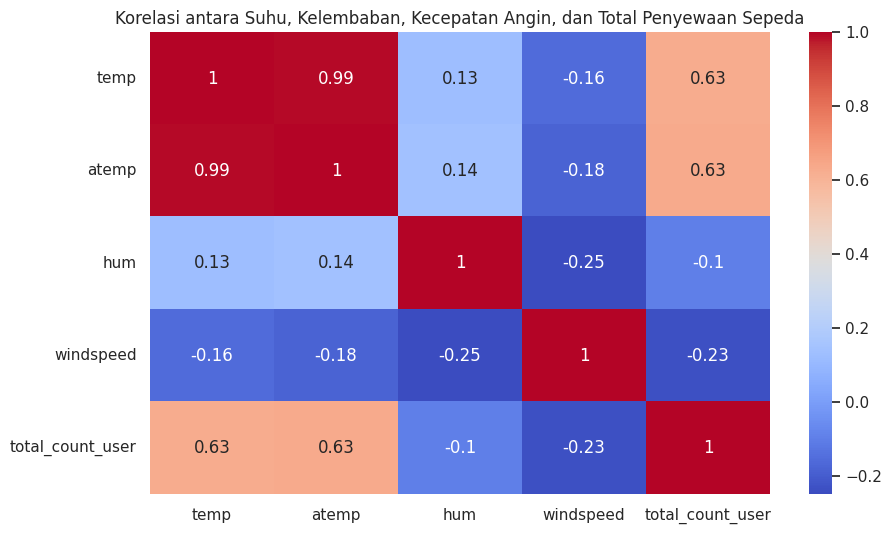

In [83]:

# Korelasi antara suhu (temp and atemp), kelembaban (hum), dan kecepatan angin dengan total penyewaan sepeda

# Menghitung korelasi
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'total_count_user']].corr()

# Menampilkan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu, Kelembaban, Kecepatan Angin, dan Total Penyewaan Sepeda')
plt.show()


dari 4 gambar plot terakhir menunjukkan hubungan temp, atemp, hum dan windspeed dengan jumlah penyewa berdasarkan season. hubungan temp dan temperatur berkolerasi positif, jika temperature meningkat maka total penyewa cenderung meningkat. sama halnya dengan atemp. namun pada hubungan hum, tidak menunjukkan semakin tinggi nilai humidity maka semakin tinggi juga jumlah penyewa walaupun tidak terlalu signifikan. untuk windspeed jumlah penyewa lebih banyak ketika nilai windspeed tidak terlalu tinggi.


### Pertanyaan 5: Bagaimana perubahan musim dan kondisi cuaca mempengaruhi total penyewaan sepeda?

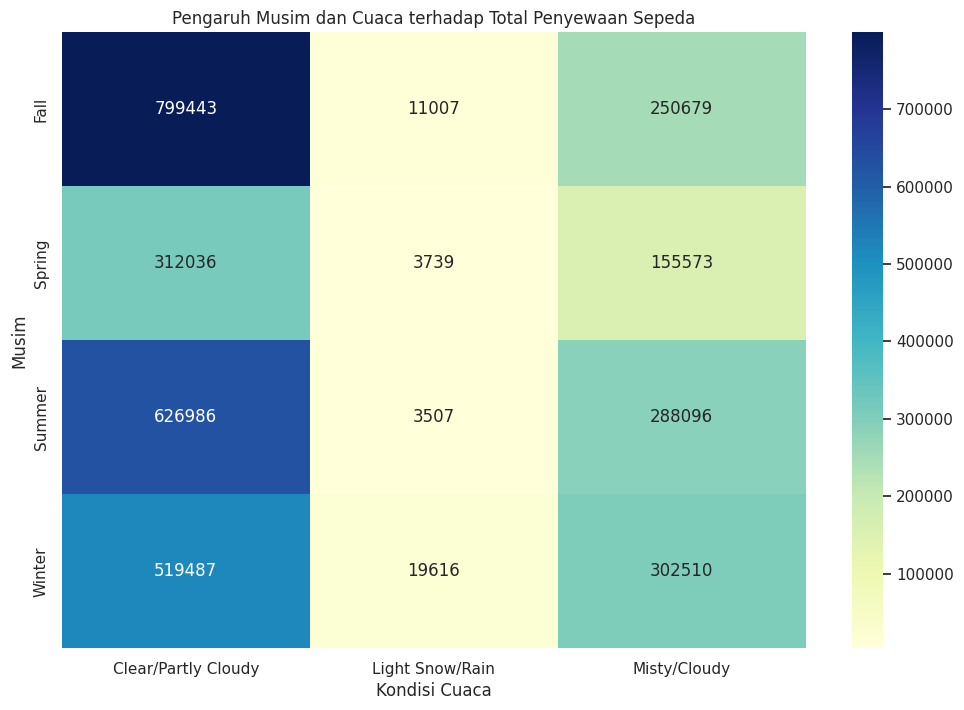

In [84]:

# Membuat pivot table untuk melihat pengaruh musim dan cuaca terhadap total penyewaan sepeda
pivot_table = day_df.pivot_table(values='total_count_user', index='season', columns='weathersit', aggfunc='sum')

# Menampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Pengaruh Musim dan Cuaca terhadap Total Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Musim')
plt.show()


penyewaan sepeda sangat dipengaruhi oleh musim seperti pada data diatas bisa kita bahwa penyewaan terbanyak terjadi pada musim fall yakni sebesar 799443


## Conclusion

1. dilihat dari data tahunan, jumlah penyewa meningkat dari tahun 2011 ke 2012, namun terjadi penurunan jumlah total penyewa pada akhir tahun 2012.
2. Sewa sepeda mencapai puncaknya pada hari Jumat, menunjukkan bahwa penggunaan sepeda secara signifikan meningkat menjelang akhir pekan.
3. jumlah penyewa lebih tinggi pada saat hari kerja
4. dari 4 gambar plot terakhir menunjukkan hubungan temp, atemp, hum dan windspeed dengan jumlah penyewa berdasarkan season. namun pada hubungan hum, tidak menunjukkan semakin tinggi nilai humidity maka semakin tinggi juga jumlah penyewa walaupun tidak terlalu signifikan.
5. total penyewa dari tahun 2011 sampai 2012 dapat diperhatikan dipengaruhi oleh musim (season) dengan jumlah paling banyak pada musim gugur (fall)

### RFM Analysis




Digunakan untuk memahami perilaku pelanggan berdasarkan tiga faktor utama: Recency  (seberapa sering pelanggan baru-baru ini berinteraksi dengan perusahaan), Frekuensi (seberapa sering pelanggan berinteraksi), dan Moneter (berapa banyak uang yang dibelanjakan pelanggan)


In [85]:
# Menghitung rfm
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### Analisis Clustering



Teknik clustering seperti K-Means yang mengelompokkan data berdasarkan karakteristik tertentu. Misalnya, kita ingin mengelompokkan pengguna berdasarkan pola penggunaan sepedanya.


In [86]:

# Menyiapkan data yang akan digunakan untuk clustering
X = rfm_df[['Frequency', 'Monetary']]

# Menentukan jumlah cluster
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# Melakukan clustering
rfm_df['cluster'] = kmeans.fit_predict(X)

print(rfm_df[['registered', 'Frequency', 'Monetary', 'cluster']].head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   registered  Frequency  Monetary  cluster
0           0         24        35        0
1           1        201       294        0
2           2        245       648        0
3           3        294      1154        0
4           4        307      1602        0


In [87]:
# Membuat scatter plot
fig = px.scatter(rfm_df, x='Frequency', y='Monetary', color='cluster', labels={'Frequency': 'Frequency', 'Monetary': 'Monetary'})

fig.update_layout(
    title='Scatter Plot dari Data yang Telah Di-cluster',
    xaxis_title='Frequency',
    yaxis_title='Monetary'
)

fig.show()

In [90]:

merged_df = pd.merge(hour_df, day_df, left_on='dteday', right_on='dateday')

# Simpan hasil penggabungan ke dalam file CSV
merged_df.to_csv('main_data.csv', index=False)

